# CNN Basics: a study of Convolutional Neural Networks
I thank [Anne Bonner](https://towardsdatascience.com/@annebonner), author of two amazing articles on Towards Data Science about the basics of Deep Learning for image recognition.

I developed this CNN for the picture of my own personal baby cat. This notebook was based on [Anne's article](https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb). 


### Image classification
Image classification is the process of taking an input (picture) and outputting a class (like “cat”) or a probability that the input is a particular class (“90% probability that this input is a cat”). Uses 2D layers, ideal for processing images. 

Applications: video recognition, image classification, recommender systems, natural language processing and medical image analysis.

A CNN usually follow this steps:
1. Load image and convert to grayscale
2. Build Convolutional layers
3. Build ReLU layers (increase non-linearity)
4. Pooling layers (spatial purposes and prevent overfitting)
5. Flatten (turn image into vector for further processing)
6. Fully conected layer (combine features and attributes, has a classifier)


In [ ]:
# importing libs
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

### Input image, convert to pixels
Grayscaling is process by which an image is converted from a full color to shades of grey (black & white)

- Those pixels are interpreted as a 2D array (for example, 2x2 pixels). 
- Every pixel has a value between 0 and 255. (Zero is completely black and 255 is completely white. 
- The greyscale exists between those numbers.) Based on that information, the computer can begin to work on the data.


In [ ]:
# uploading file
from google.colab import files
uploaded = files.upload()

Saving dende.jpeg to dende.jpeg


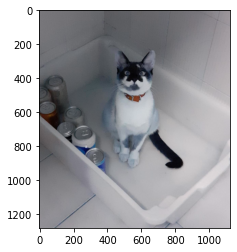

In [ ]:
# load image
image = cv2.imread('dende.jpeg')
plt.imshow(image)

In [ ]:
# print dimensions
print(f'Height of Image: {image.shape[0]} pixels')
print(f'Width of Image: {image.shape[1]} pixels')

Height of Image: 1280 pixels
Width of Image: 1124 pixels


In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

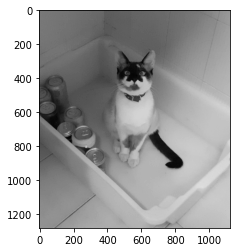

In [ ]:
# Plot image
plt.imshow(gray_image, cmap='gray')
plt.show()

### Filters
- You have an input image, a feature detector, and a feature map. 

- You take the filter and apply it pixel block by pixel block to the input image. You do this through the multiplication of the matrices.

- Your filter is an array of numbers (also called weights or parameters). 

- The primary purpose here is to find features in your image, put them into a feature map, and still preserve the spatial relationship between pixels.

In [ ]:
# define and visualize filters
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [ ]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


### Building a neural network: Convolutional Layer
A CNN starts with an input image (in our case, 'dende.jpeg') and applies many different filters to it in order to create a feature map. 

In [ ]:
# Neural network with one convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # Returns both layers
        return conv_x, activated_x
    
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [ ]:
# function to visualize layers
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

NotImplementedError: ignored

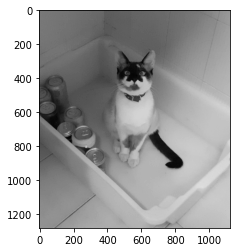

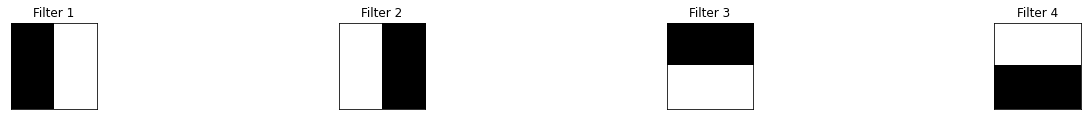

In [ ]:
# Plot original image
plt.imshow(gray_image, cmap='gray')

# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# Convert the image into an input tensor
gray_image_tensor = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(1)

# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_image_tensor)

# Visualize the output of a convolutional layer
viz_layer(conv_layer)

We are visualizing here the output of a convolutional layer before a ReLu activation function is applied. 

### Custom kernel
Create a custom kernel using sobel operator (detection filter). It's purpose is to find patterns in intensity in an image.

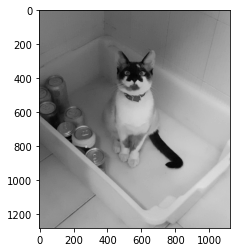

In [ ]:
# create custom kernel using sobel operator (detection filter)
# convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

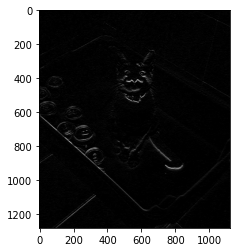

In [ ]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image, cmap='gray')

### ReLU Layer
The ReLU (rectified linear unit) layer is another step to our convolution layer. You’re applying an activation function onto your feature maps to increase non-linearity in the network. This is because images themselves are highly non-linear! It removes negative values from an activation map by setting them to zero.

### Pooling layer
- You want lots of pictures of the same thing so that your network can recognize an object (cat, for example) in all the images. No matter what the size or location. No matter what the lighting or the number of spots, or whether that leopard is fast asleep or crushing prey. You want spatial variance! You want flexibility. That’s what pooling is all about.

- Pooling progressively reduces the size of the input representation. It makes it possible to detect objects in an image no matter where they’re located. Pooling helps to reduce the number of required parameters and the amount of computation required. It also helps control overfitting.

- The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps. It does this by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.


### Flattening
This is a pretty simple step. You flatten the pooled feature map into a sequential column of numbers (a long vector). This allows that information to become the input layer of an artificial neural network for further processing.

### Fully connected layer
At this step, we add an artificial neural network to our convolutional neural network. 

- The main purpose of the artificial neural network is to combine our features into more attributes. These will predict the classes with greater accuracy. This combines features and attributes that can predict classes better.

- At this step, the error is calculated and then backpropagated. The weights and feature detectors are adjusted to help optimize the performance of the model. Then the process happens again and again and again.

- The fully connected layer is a traditional Multi-Layer Perceptron. It uses a classifier in the output layer. The classifier is usually a softmax activation function. Fully connected means every neuron in the previous layer connects to every neuron in the next layer. What’s the purpose of this layer? To use the features from the output of the previous layer to classify the input image based on the training data.

## To summarize:
1. We started with an input image and applied multiple different features to create a feature map. 

2. We applied the ReLU to increase non-linearity and applied a pooling layer to each feature map. (We did that to make sure we have spatial variance in our images, to reduce the size of the images, and to avoid overfitting of the model to the data while still preserving the features we’re after.) 

3. We flattened all the pooled images into one long vector. 

4. We input the vector into our fully connected artificial neural network. This is where all the features were processed through the network. This gave us the final fully connected layer which provided the “voting” of the classes that we’re after. All of this was trained through forward propagation and backpropagation until we wound up with a well defined neural network where the weights and feature detectors were trained.